In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import pathlib
import torchvision.transforms.functional as TF
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


In [ ]:
artist_df = pd.read_csv('artists.csv')
artist_df.rename(columns={'name':'Name',
                          'years':'Years',
                          'genre':'Genre',
                          'nationality':'Nationality',
                          'paintings':'Num_paintings',}, inplace=True)
artist_df.sample(5)

,id,Name,Years,Genre,Nationality,bio,wikipedia,Num_paintings
18,18,El Greco,1541 - 1614,Mannerism,"Spanish,Greek",Doménikos Theotokópoulos (Greek: Δομήνικος Θεο...,http://en.wikipedia.org/wiki/El_Greco,87
16,16,Francisco Goya,1746 - 1828,Romanticism,Spanish,Francisco José de Goya y Lucientes (; Spanish:...,http://en.wikipedia.org/wiki/Francisco_Goya,291
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
13,13,Pablo Picasso,1881 - 1973,Cubism,Spanish,Pablo Ruiz Picasso (; Spanish: [ˈpaβlo piˈkaso...,http://en.wikipedia.org/wiki/Pablo_Picasso,439
46,46,Paul Gauguin,1848 – 1903,"Symbolism,Post-Impressionism",French,"Eugène Henri Paul Gauguin (UK: , US: ; French:...",http://en.wikipedia.org/wiki/Paul_Gauguin,311


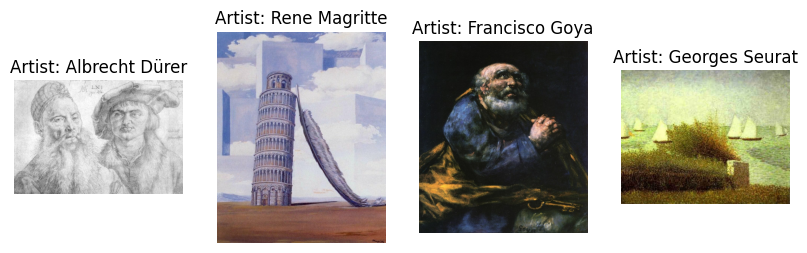

In [ ]:
#images_dir = 'C:/Users/vlaks/Desktop/QMUL_sem_2/Neural_Networks_and_Deep_Learning/PredictArtist/images/images'
images_dir = pathlib.Path('images/images')
artist_dirs = os.listdir(images_dir)
artist_name = artist_df['Name'].str.replace(' ', '_').values

n = 4
fig, axes = plt.subplots(1, n, figsize=(10,5))

for i in range(n):
    random_artist = random.choice(artist_name)
    random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
    random_image_file = os.path.join(images_dir, random_artist, random_image)
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    axes[i].set_title("Artist: " + random_artist.replace('_', ' '))
    axes[i].axis('off')

plt.show()

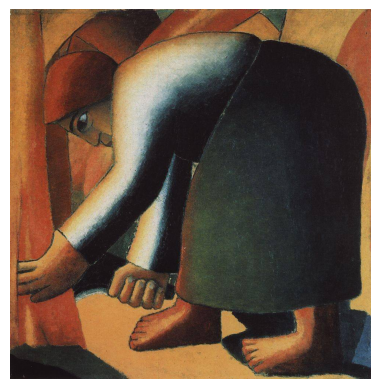

In [ ]:
random_artist = random.choice(artist_name)
random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
random_image_file = os.path.join(images_dir, random_artist, random_image)
image = Image.open(random_image_file)
imgplot = plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
rotated_image_45 = TF.rotate(image,45)
horizontal_flip_image = TF.hflip(image)


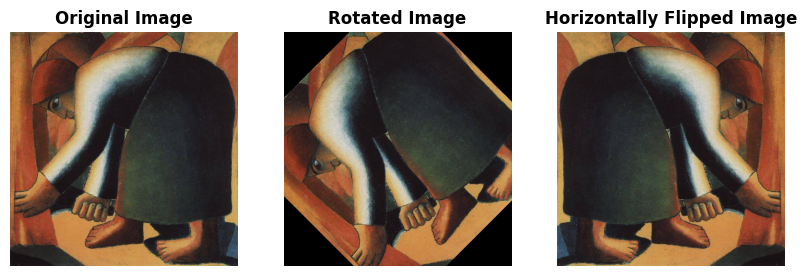

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(image)
axs[0].set_title("Original Image", fontweight='bold')
axs[0].axis('off')
axs[1].imshow(rotated_image_45)
axs[1].set_title("Rotated Image", fontweight='bold')
axs[1].axis('off')
axs[2].imshow(horizontal_flip_image)
axs[2].set_title("Horizontally Flipped Image", fontweight='bold')
axs[2].axis('off')

# show the plot
plt.show()